In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
product_list_path = '/content/productlist.csv'
reviews_path = '/content/productReviews.csv'

In [3]:
product_list = pd.read_csv(product_list_path)
reviews = pd.read_csv(reviews_path)

In [4]:
# Convert product IDs to string to avoid scientific notation issues
product_list['product_id'] = product_list['product_id'].astype(str)
reviews['product_id'] = reviews['product_id'].astype(str)

In [5]:
print("Product List Dataset Overview:")
print(product_list.info())
print(product_list.describe())

Product List Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           237 non-null    int64 
 1   product_id           237 non-null    object
 2   product_name         237 non-null    object
 3   product_brand        237 non-null    object
 4   price                237 non-null    object
 5   product_description  237 non-null    object
 6   product_type         237 non-null    object
dtypes: int64(1), object(6)
memory usage: 13.1+ KB
None
       Unnamed: 0
count  237.000000
mean   151.561181
std     90.444532
min      0.000000
25%     69.000000
50%    145.000000
75%    234.000000
max    298.000000


In [6]:
# 2. Count of Unique Products
unique_products = product_list['product_id'].nunique()
print(f"Number of unique products: {unique_products}")


Number of unique products: 131


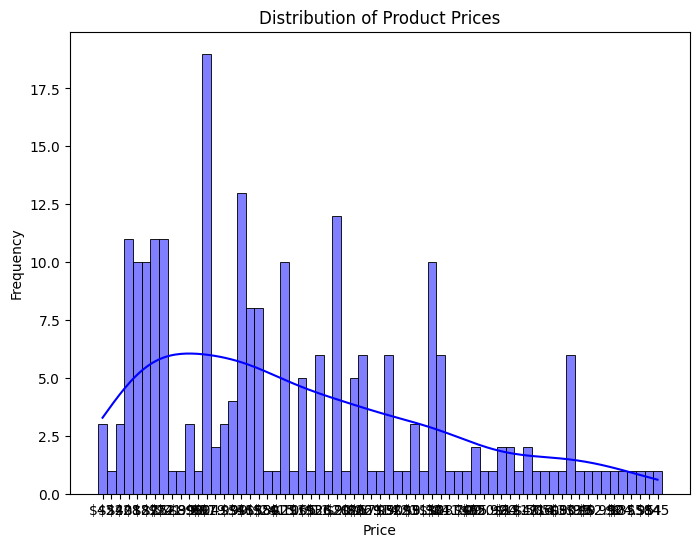

In [7]:
# 3. Distribution of Product Prices
plt.figure(figsize=(8, 6))
sns.histplot(product_list['price'], bins=20, kde=True, color='blue')
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


<ipython-input-8-c37b4a437e16>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_types.values, y=top_product_types.index, palette='viridis')


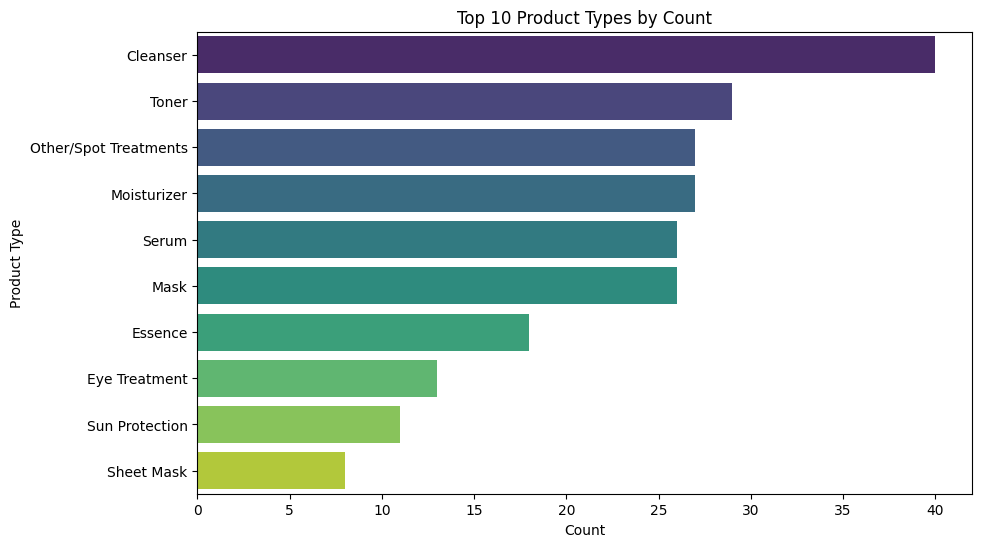

In [8]:
# 4. Top 10 Product Types by Count
top_product_types = product_list['product_type'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_product_types.values, y=top_product_types.index, palette='viridis')
plt.title("Top 10 Product Types by Count")
plt.xlabel("Count")
plt.ylabel("Product Type")
plt.show()

<ipython-input-9-95a8adfa9785>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_brands.values, y=top_product_brands.index, palette='magma')


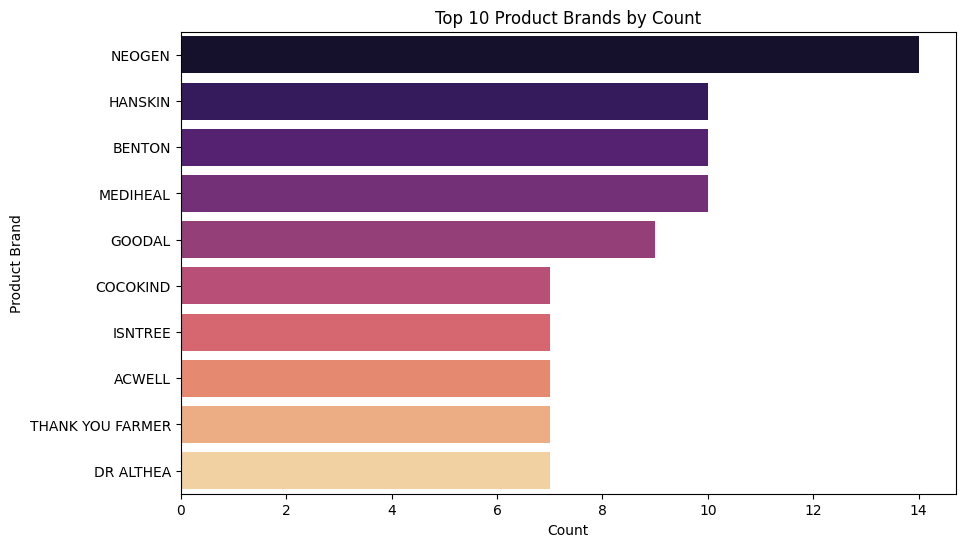

In [9]:
# 5. Top 10 Product Brands by Count
top_product_brands = product_list['product_brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_product_brands.values, y=top_product_brands.index, palette='magma')
plt.title("Top 10 Product Brands by Count")
plt.xlabel("Count")
plt.ylabel("Product Brand")
plt.show()


In [10]:
# 6. Overview of the Product Reviews
print("\nProduct Reviews Dataset Overview:")
print(reviews.info())
print(reviews.describe())



Product Reviews Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15040 entries, 0 to 15039
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sno         15040 non-null  int64 
 1   product_id  15040 non-null  object
 2   review      15040 non-null  object
dtypes: int64(1), object(2)
memory usage: 352.6+ KB
None
                sno
count  15040.000000
mean    7519.500000
std     4341.818359
min        0.000000
25%     3759.750000
50%     7519.500000
75%    11279.250000
max    15039.000000


<ipython-input-11-f3984b9d521e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_per_product.values, y=reviews_per_product.index, palette='plasma')


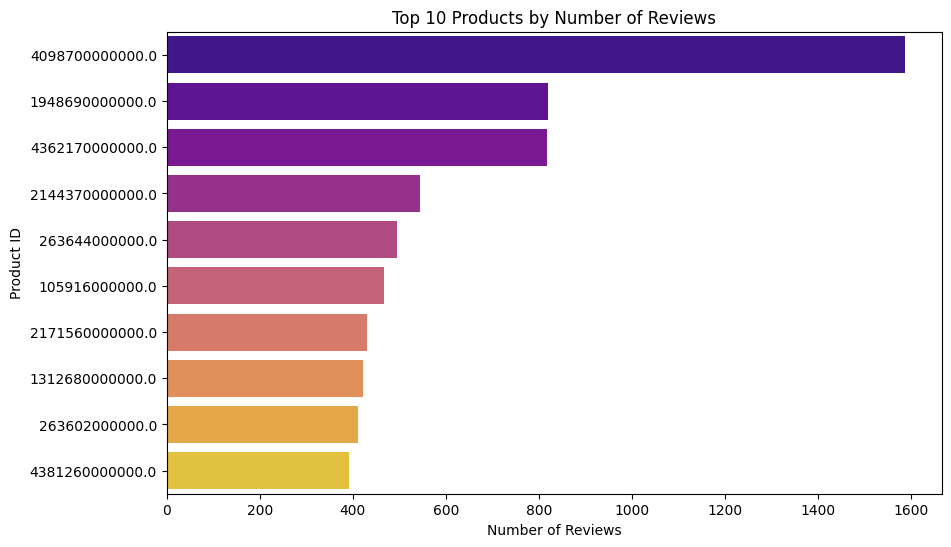

In [11]:
# 7. Count of Reviews per Product
reviews_per_product = reviews['product_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=reviews_per_product.values, y=reviews_per_product.index, palette='plasma')
plt.title("Top 10 Products by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Product ID")
plt.show()

In [12]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.2 MB/s eta 0:00:00


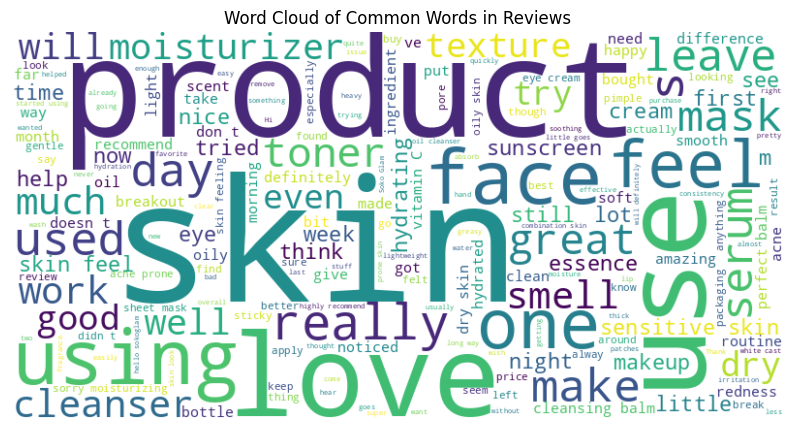

In [13]:
# 8. Word Cloud for Common Words in Reviews
from wordcloud import WordCloud

all_reviews = ' '.join(reviews['review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Common Words in Reviews")
plt.axis('off')
plt.show()

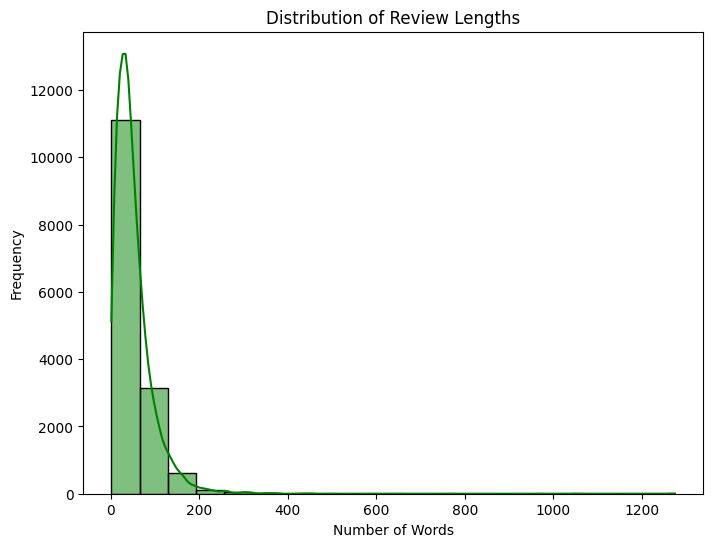

In [14]:
# 9. Length of Reviews Distribution
reviews['review_length'] = reviews['review'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
plt.figure(figsize=(8, 6))
sns.histplot(reviews['review_length'], bins=20, kde=True, color='green')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [15]:
# Merge reviews and product list on product_ID
merged_data = pd.merge(reviews, product_list, left_on='product_id', right_on='product_id')
merged_data

,sno,product_id,review,review_length,Unnamed: 0,product_name,product_brand,price,product_description,product_type
0,0,4669760000000.0,This makes my skin smooth and soft and is ligh...,13,59,Lotus Water Cream,ROVECTIN,$20,This facial moisturizer not only deeply hydrat...,Toner
1,0,4669760000000.0,This makes my skin smooth and soft and is ligh...,13,61,LHA Blemish Ampoule,ROVECTIN,$15,This ampoule contains only the essentials for ...,Serum
2,1,4669760000000.0,Love the silky texture. It's very lightweight ...,32,59,Lotus Water Cream,ROVECTIN,$20,This facial moisturizer not only deeply hydrat...,Toner
3,1,4669760000000.0,Love the silky texture. It's very lightweight ...,32,61,LHA Blemish Ampoule,ROVECTIN,$15,This ampoule contains only the essentials for ...,Serum
4,2,4669760000000.0,I’ve been trying to find a moisturizer that wo...,35,59,Lotus Water Cream,ROVECTIN,$20,This facial moisturizer not only deeply hydrat...,Toner
...,...,...,...,...,...,...,...,...,...,...
25849,11565,1706890000000.0,Benton hits it out of the park as usual. This ...,52,68,Goodbye Redness Centella Mask Pack,BENTON,$2.80,"Relief from redness, irritation and inflamed b...",Mask
25850,11566,1706890000000.0,"While I liked this mask, it didn’t seem overly...",169,68,Goodbye Redness Centella Mask Pack,BENTON,$2.80,"Relief from redness, irritation and inflamed b...",Mask
25851,11567,1706890000000.0,I really liked this mask! It had a lot of esse...,79,68,Goodbye Redness Centella Mask Pack,BENTON,$2.80,"Relief from redness, irritation and inflamed b...",Mask
25852,11568,1706890000000.0,I am in love with these face masks. After just...,36,68,Goodbye Redness Centella Mask Pack,BENTON,$2.80,"Relief from redness, irritation and inflamed b...",Mask


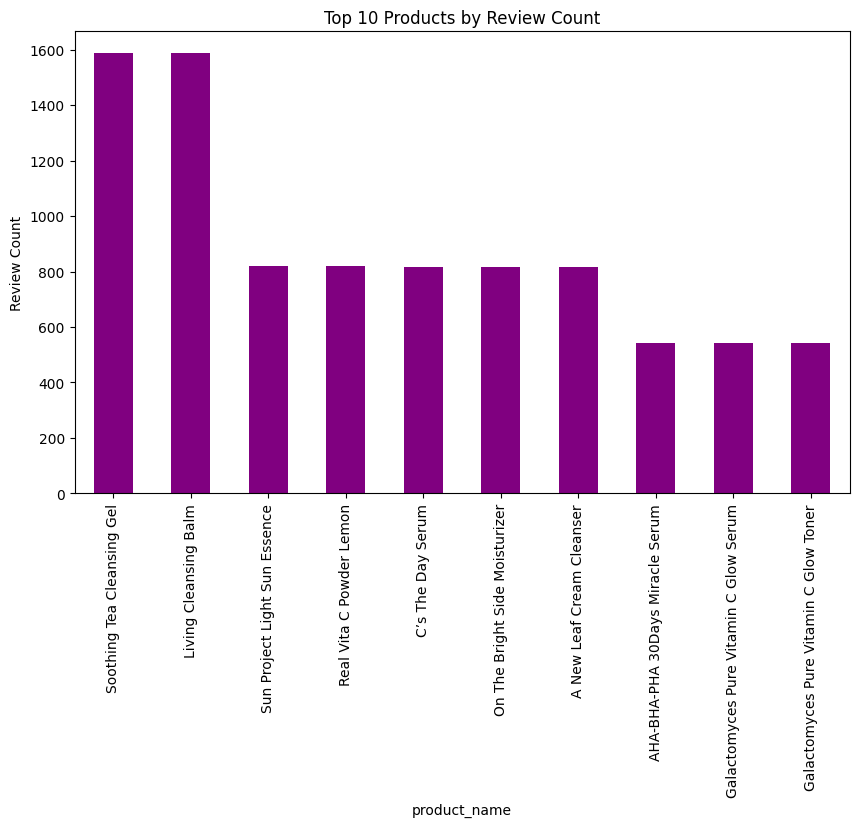

In [16]:
# 10. Product Review Counts After Merging
plt.figure(figsize=(10, 6))
merged_data['product_name'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Products by Review Count")
plt.ylabel("Review Count")
plt.show()

In [17]:
# Remove any leading/trailing spaces from product IDs
merged_data['product_id'] = merged_data['product_id'].str.strip()
merged_data['product_id'] = merged_data['product_id'].str.strip()


In [18]:
# Data Preprocessing: Fill NaN values if necessary
merged_data['review'] = merged_data['review'].fillna('')
merged_data['product_description'] = merged_data['product_description'].fillna('')
merged_data

,sno,product_id,review,review_length,Unnamed: 0,product_name,product_brand,price,product_description,product_type
0,0,4669760000000.0,This makes my skin smooth and soft and is ligh...,13,59,Lotus Water Cream,ROVECTIN,$20,This facial moisturizer not only deeply hydrat...,Toner
1,0,4669760000000.0,This makes my skin smooth and soft and is ligh...,13,61,LHA Blemish Ampoule,ROVECTIN,$15,This ampoule contains only the essentials for ...,Serum
2,1,4669760000000.0,Love the silky texture. It's very lightweight ...,32,59,Lotus Water Cream,ROVECTIN,$20,This facial moisturizer not only deeply hydrat...,Toner
3,1,4669760000000.0,Love the silky texture. It's very lightweight ...,32,61,LHA Blemish Ampoule,ROVECTIN,$15,This ampoule contains only the essentials for ...,Serum
4,2,4669760000000.0,I’ve been trying to find a moisturizer that wo...,35,59,Lotus Water Cream,ROVECTIN,$20,This facial moisturizer not only deeply hydrat...,Toner
...,...,...,...,...,...,...,...,...,...,...
25849,11565,1706890000000.0,Benton hits it out of the park as usual. This ...,52,68,Goodbye Redness Centella Mask Pack,BENTON,$2.80,"Relief from redness, irritation and inflamed b...",Mask
25850,11566,1706890000000.0,"While I liked this mask, it didn’t seem overly...",169,68,Goodbye Redness Centella Mask Pack,BENTON,$2.80,"Relief from redness, irritation and inflamed b...",Mask
25851,11567,1706890000000.0,I really liked this mask! It had a lot of esse...,79,68,Goodbye Redness Centella Mask Pack,BENTON,$2.80,"Relief from redness, irritation and inflamed b...",Mask
25852,11568,1706890000000.0,I am in love with these face masks. After just...,36,68,Goodbye Redness Centella Mask Pack,BENTON,$2.80,"Relief from redness, irritation and inflamed b...",Mask


In [19]:
# Combine important features into one column for content-based filtering
merged_data['combined_features'] = merged_data['product_description'] + " " + merged_data['product_name'] + " " + merged_data['product_type'] + " " + merged_data['review']


In [20]:
# Use TF-IDF Vectorizer to vectorize the combined features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(merged_data['combined_features'])


In [21]:
# Compute the cosine similarity between products based on the combined features
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.33872643, 0.86583717, ..., 0.07024597, 0.07034967,
        0.06375847],
       [0.33872643, 1.        , 0.28798423, ..., 0.05475592, 0.06417084,
        0.05036207],
       [0.86583717, 0.28798423, 1.        , ..., 0.06486052, 0.06791525,
        0.0644892 ],
       ...,
       [0.07024597, 0.05475592, 0.06486052, ..., 1.        , 0.68009287,
        0.52935838],
       [0.07034967, 0.06417084, 0.06791525, ..., 0.68009287, 1.        ,
        0.6173895 ],
       [0.06375847, 0.05036207, 0.0644892 , ..., 0.52935838, 0.6173895 ,
        1.        ]])

In [22]:
# Function to get product recommendations based on review similarity
def get_recommendations(product_id, cosine_sim=cosine_sim, df=merged_data):

    # Check if the product_id exists in the DataFrame
    if product_id not in df['product_id'].values:
        return f"Product ID {product_id} not found in the dataset."

    # Find the index of the product in the dataframe
    idx = df.index[df['product_id'] == product_id].tolist()[0]

    # Get the pairwise similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the most similar products,
    sim_scores = sim_scores[1:]

    # Get the product indices
    product_indices = [i[0] for i in sim_scores]

    # Retrieve the recommended products
    recommended_products = df.iloc[product_indices]

    # Remove duplicates based on product name, brand, and price
    recommended_products = recommended_products.drop_duplicates(subset=['product_name', 'product_brand', 'price'])

    # Return the top 5 most similar and unique products
    return recommended_products[['product_name', 'product_brand', 'price']].head(5)




In [23]:
product_id = '4669760000000.0'
recommended_products = get_recommendations(product_id)

# Display the recommended products or the error message
print(recommended_products)

                                      product_name product_brand price
26                               Lotus Water Cream      ROVECTIN   $20
1                              LHA Blemish Ampoule      ROVECTIN   $15
11743                  Fundamental Water Gel Cream        KLAIRS   $31
6157             Safe Me. Relief Moisture Cream 12    MAKE P:REM   $36
22649  Skin Essentials Activating Treatment Lotion      ROVECTIN   $29


In [25]:
import numpy as np
from collections import defaultdict
from sklearn.metrics import f1_score

# Define the metrics

# 1. NDCG@K (Normalized Discounted Cumulative Gain)
def ndcg_at_k(predictions, k=5, threshold=3):
    dcg = 0.0
    idcg = 0.0
    for idx, (iid, est, true_r) in enumerate(predictions[:k]):
        if true_r >= threshold:
            dcg += 1 / np.log2(idx + 2)
        if true_r >= threshold:
            idcg += 1 / np.log2(idx + 2)
    return dcg / idcg if idcg > 0 else 0.0

In [26]:
# 2. F1-Score@K
def f1_score_at_k(predictions, k=5, threshold=3):
    y_true = []
    y_pred = []
    for idx, (iid, est, true_r) in enumerate(predictions[:k]):
        y_true.append(1 if true_r >= threshold else 0)
        y_pred.append(1 if est >= threshold else 0)
    return f1_score(y_true, y_pred)

In [27]:
# 3. Hit Rate@K
def hit_rate_at_k(predictions, k=5, threshold=3):
    hits = 0
    for idx, (iid, est, true_r) in enumerate(predictions[:k]):
        if true_r >= threshold:
            hits += 1
    return hits / k


In [28]:
# 4. Coverage@K
def coverage_at_k(predictions, k=5):
    all_recommended_items = set()
    for idx, (iid, _, _) in enumerate(predictions[:k]):
        all_recommended_items.add(iid)
    return len(all_recommended_items) / len(predictions)

In [29]:
# 5. MRR@K (Mean Reciprocal Rank)
def mrr_at_k(predictions, k=5, threshold=3):
    mrr_score = 0.0
    for idx, (iid, est, true_r) in enumerate(predictions[:k]):
        if true_r >= threshold:
            mrr_score += 1 / (idx + 1)
            break
    return mrr_score if mrr_score > 0 else 0.0

In [30]:
# Example of predictions (List of tuples containing: (item_id, predicted_rating, actual_rating))
predictions = [
    ('12345', 4.5, 5),  # (product_id, predicted_rating, actual_rating)
    ('23456', 3.0, 4),
    ('34567', 4.0, 2),
    ('45678', 5.0, 5),
    ('56789', 3.5, 3)
]
# Compute Metrics for Top 5 Recommendations
k = 5
ndcg_score = ndcg_at_k(predictions, k)
f1_score_k = f1_score_at_k(predictions, k)
hit_rate_score = hit_rate_at_k(predictions, k)
coverage_score = coverage_at_k(predictions, k)
mrr_score = mrr_at_k(predictions, k)

# Print Results
print(f"NDCG@{k}: {ndcg_score}")
print(f"F1-Score@{k}: {f1_score_k}")
print(f"Hit Rate@{k}: {hit_rate_score}")
print(f"Coverage@{k}: {coverage_score}")
print(f"MRR@{k}: {mrr_score}")

NDCG@5: 1.0
F1-Score@5: 0.8888888888888888
Hit Rate@5: 0.8
Coverage@5: 1.0
MRR@5: 1.0


In [31]:
from sklearn.metrics import precision_score, recall_score

# 6. Precision@K
def precision_at_k(predictions, k=5, threshold=3):
    y_true = []
    y_pred = []
    for idx, (iid, est, true_r) in enumerate(predictions[:k]):
        y_true.append(1 if true_r >= threshold else 0)
        y_pred.append(1 if est >= threshold else 0)
    return precision_score(y_true, y_pred)

In [32]:
# 7. Recall@K
def recall_at_k(predictions, k=5, threshold=3):
    y_true = []
    y_pred = []
    for idx, (iid, est, true_r) in enumerate(predictions[:k]):
        y_true.append(1 if true_r >= threshold else 0)
        y_pred.append(1 if est >= threshold else 0)
    return recall_score(y_true, y_pred)

In [33]:
precision_score_k = precision_at_k(predictions, k)
recall_score_k = recall_at_k(predictions, k)
print(f"Precision@{k}: {precision_score_k}")
print(f"Recall@{k}: {recall_score_k}")

Precision@5: 0.8
Recall@5: 1.0
